In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
import tensorflow_addons as tfa

2023-02-08 15:46:15.159305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mpl.rcParams['figure.figsize'] = [15, 12]

In [3]:
#Importing classification dataset from preprocessing folder 
data = pd.read_excel('../preprocessing/regressionData.xlsx')

In [4]:
data

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Time
0,119513,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5,31
1,8423,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2,61
2,842517,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0,116
3,843483,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0,123
4,843584,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2,10
194,943471,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0,8
195,94547,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0,12
196,947204,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3,3


In [5]:
#drop out id column
data.drop(['id number'], axis=1, inplace=True)

In [6]:
#We define X and y
y = data.pop('Time')
X = data

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13523229046094250759
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6455885824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15181168892671370801
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-02-08 15:46:16.619809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 15:46:16.652935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 15:46:16.674238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 15:46:16.674419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but th

In [8]:
def Histo_prediction_true(y_true, y_pred):
    sns.histplot(y_true, kde=False, bins=30, color='pink')
    sns.histplot(y_pred, kde=False, bins=30, color='blue')
    plt.legend(labels=['Actual Values of time', 'Predicted Values of time'])

In [9]:
def Fitfunction(y_true, y_pred):
    plt.scatter(y_true, y_pred, color='purple')
    plt.plot(y_true, y_true, color='red')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

In [10]:
def plot_metrics(history):
  metrics = ['loss', 'MAE', 'RMSE', 'r_square']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

In [72]:
EPOCHS = 50
BATCH_SIZE = 100

In [12]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=.8)

In [14]:
METRICS = [
    keras.metrics.MeanSquaredError(name="MSE"),
    keras.metrics.MeanAbsoluteError(name="MAE"),
    keras.metrics.RootMeanSquaredError(name="RMSE"),
    tfa.metrics.RSquare(name='r_square')
]

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(120, activation="relu"),
        keras.layers.Dense(1)])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='mean_absolute_error',
        metrics=metrics)
    return model

2023-02-08 15:46:17.011257: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 15:46:17.011523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 15:46:17.011667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 15:46:17.012036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 15:46:17.012244: I tensorflow/compiler/xla/stream_executo

In [15]:
METRICS = [
    keras.metrics.MeanSquaredError(name="MSE"),
    keras.metrics.MeanAbsoluteError(name="MAE"),
    keras.metrics.RootMeanSquaredError(name="RMSE"),
    tfa.metrics.RSquare(name='r_square')
]

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(26, activation="relu"),
        keras.layers.Dense(1)])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='mean_absolute_error',
        metrics=metrics)
    return model

In [16]:
model = make_model()
history = model.fit(
    train_X,
    train_y,
    epochs=EPOCHS,
    validation_split=.2,
    verbose=0)

2023-02-08 15:46:18.409609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


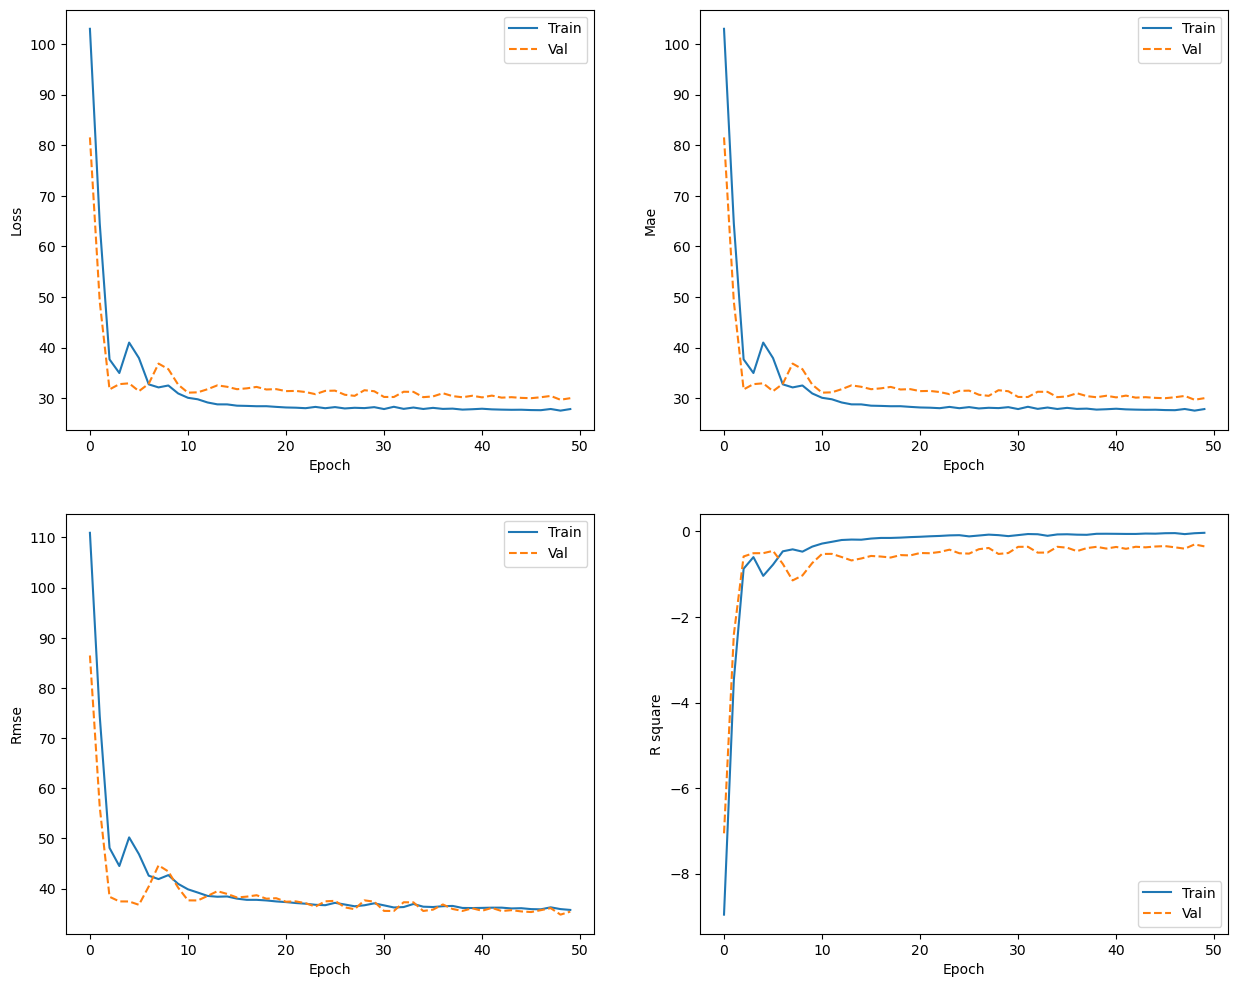

In [17]:
plot_metrics(history)
plt.savefig("regMetrics.png", dpi=300, bbox_inches='tight')

In [18]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 2ms/step - loss: 28.0638 - MSE: 1276.3641 - MAE: 28.0638 - RMSE: 35.7262 - r_square: -0.0752


[28.06382942199707,
 1276.3641357421875,
 28.06382942199707,
 35.72623825073242,
 -0.07520341873168945]

2/2 [==============================] - 0s 2ms/step


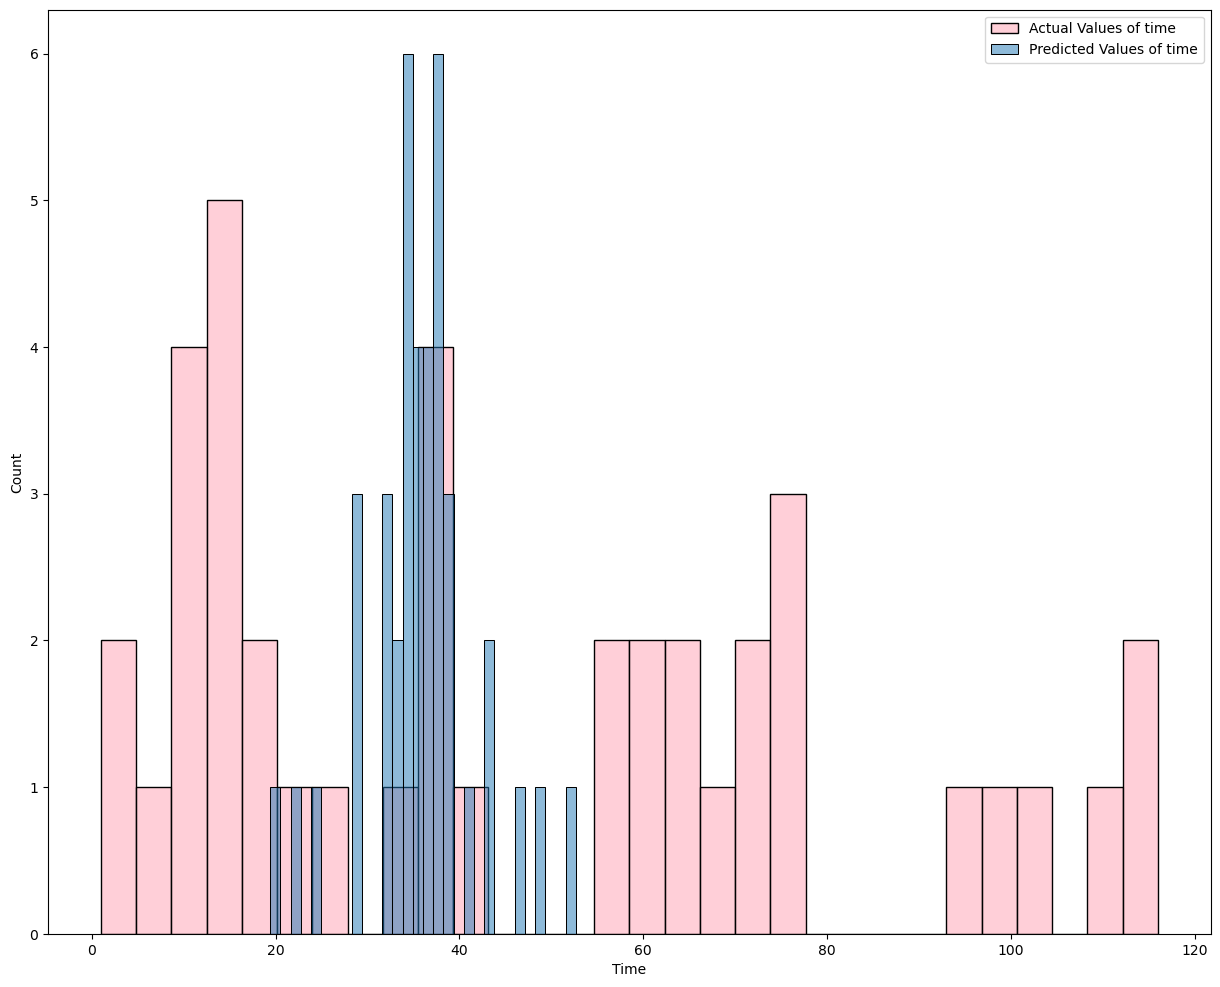

In [19]:
Histo_prediction_true(test_y, model.predict(test_X))
plt.savefig("regHistogram.png", dpi=300, bbox_inches='tight')

2/2 [==============================] - 0s 2ms/step


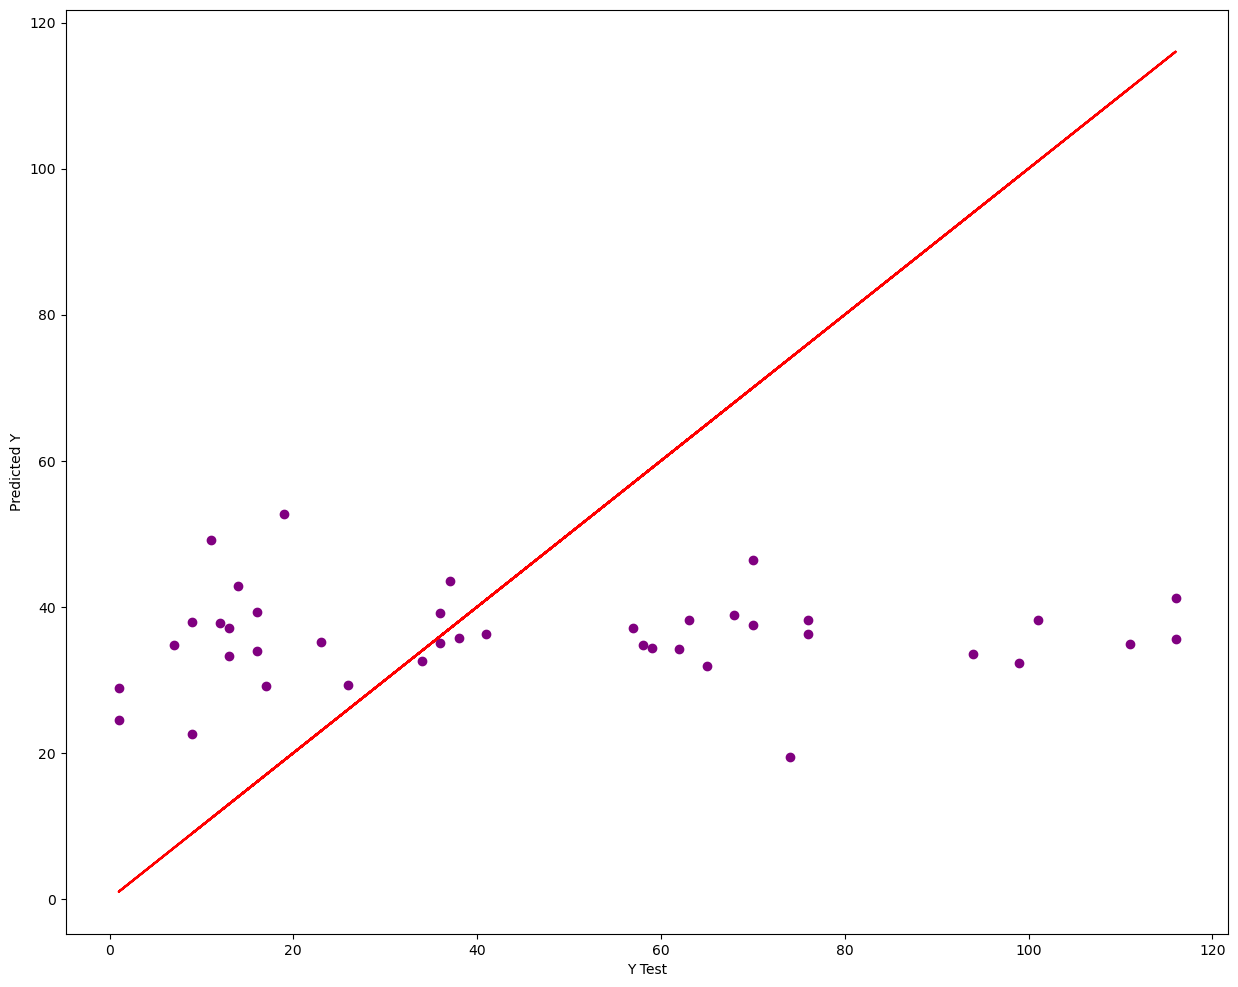

In [20]:
Fitfunction(test_y, model.predict(test_X))
plt.savefig("reg.png", dpi=300, bbox_inches='tight')

In [21]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 4ms/step - loss: 29.3133 - MSE: 1295.9244 - MAE: 29.3133 - RMSE: 35.9990 - r_square: -0.1168


[29.313318252563477,
 1295.9244384765625,
 29.313318252563477,
 35.99895095825195,
 -0.11684882640838623]